In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Importing the DataSet

In [8]:
data=pd.read_csv('/Users/rahul/Downloads/LegitCheck/train.csv')

In [45]:
X = data.iloc[:, :-1]
y=data.iloc[:,-1]

# Spliting the DataSet into Train and Test

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Feature Scaling

In [61]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model Building 

In [113]:
model=Sequential()
model.add(Dense(units=8,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [114]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Training the Model 

In [115]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
15/15 [==============================] - 0s 5ms/step - loss: 0.7075 - accuracy: 0.4674 - val_loss: 0.6960 - val_accuracy: 0.5603
Epoch 2/20
15/15 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.5435 - val_loss: 0.6902 - val_accuracy: 0.6034
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.6152 - val_loss: 0.6852 - val_accuracy: 0.6552
Epoch 4/20
15/15 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.6543 - val_loss: 0.6802 - val_accuracy: 0.6897
Epoch 5/20
15/15 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.7000 - val_loss: 0.6739 - val_accuracy: 0.7500
Epoch 6/20
15/15 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.7391 - val_loss: 0.6665 - val_accuracy: 0.7586
Epoch 7/20
15/15 [==============================] - 0s 1ms/step - loss: 0.6607 - accuracy: 0.7783 - val_loss: 0.6563 - val_accuracy: 0.7672
Epoch 8/20
15/15 [==

In [116]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

4/4 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8879
Test Accuracy: 88.79%


# Accuracy of Model 

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

4/4 [==============================] - 0s 1ms/step
[[62  1]
 [12 41]]
Accuracy: 88.79%


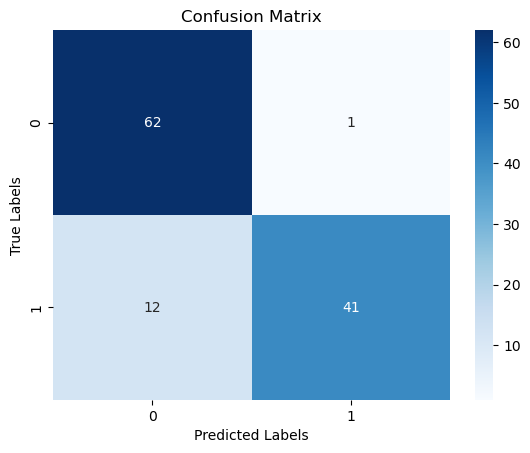

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Single Prediction

In [163]:
single_prediction=np.array([1,0.17,3,0.0,0,0,0,0,1,14,829])

#Reshape if necessary (model expects shape (1, num_features))
single_prediction = single_prediction.reshape(1, -1)

In [164]:
prediction=model.predict(single_prediction)
prediction.astype(int)

1/1 [==============================] - 0s 13ms/step


array([[0]])

In [165]:
# Convert to binary class label (0 or 1)
prediction = (prediction > 0.5).astype(int)

print("Predicted Probability:", prediction)
print("Predicted Class:", prediction)

Predicted Probability: [[0]]
Predicted Class: [[0]]
